<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="200" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

<p style="text-align: center;"><img src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="600" height="150" class="img-fluid" alt="CLRSWY_LOGO"></p>
<p style="text-align: center;"><img src="https://i.ibb.co/XS0bxSH/best-bootcamps.png" width="400" height="130" class="img-fluid" alt="CLRSWY_LOGO"></p>
<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<h1><p style="text-align: center;">Traffic Police Stops
 <br>Part - 3</p><h1> - Visual Exploratory Data Analysis<img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the previos chapter for preparing the data** or **use the csv file you created at the end of chapter-2.*** Continue to this chapter based on where you were in the end of the previous chapter.

> Be sure 'stop_datetime' column is dataframe's index.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import math
import matplotlib.pyplot as plt

In [9]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [13]:
ri = pd.read_csv("cleaned.csv")

C:\Users\nurda\AppData\Local\Temp\ipykernel_12468\1204025599.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv("cleaned.csv")


**Since the dataset has 509681 rows, you can work with the first 50000 rows if you wish.**

In [14]:
ri

,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
3,2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480579,2015-12-31 22:46:00,RI-2015-47061,Zone X1,0.0,M,1959.0,56.0,H,Hispanic,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1
480580,2015-12-31 22:47:00,RI-2015-47062,Zone X4,500.0,M,1988.0,27.0,W,White,Registration Violation,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
480581,2015-12-31 23:08:00,RI-2015-47063,Zone X3,200.0,M,1980.0,35.0,H,Hispanic,Equipment/Inspection Violation,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3
480582,2015-12-31 23:44:00,RI-2015-47064,Zone K2,900.0,M,1984.0,31.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2


**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Get the type of the dataframe's index and see the hour of the stop_datetime by using hour attribute
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [31]:
ri['stop_year'] = ri['stop_datetime'].dt.year
annual_total_stops = ri.groupby(ri['stop_datetime'].dt.year)['drugs_related_stop'].count()
annual_total_stops

stop_datetime
2005    13809
2006    55552
2007    50139
2008    45570
2009    39820
2010    39440
2011    42630
2012    57625
2013    41922
2014    48878
2015    45199
Name: drugs_related_stop, dtype: int64

In [39]:
ri.groupby('stop_year')['drugs_related_stop'].value_counts()

stop_year  drugs_related_stop
2005       False                 13698
           True                    111
2006       False                 55184
           True                    368
2007       False                 49716
           True                    423
2008       False                 45226
           True                    344
2009       False                 39404
           True                    416
2010       False                 39040
           True                    400
2011       False                 42144
           True                    486
2012       False                 57029
           True                    596
2013       False                 41424
           True                    498
2014       False                 48234
           True                    644
2015       False                 44720
           True                    479
Name: count, dtype: int64

In [44]:
annual_drug_rate = ri.groupby('stop_year')['drugs_related_stop'].mean()
annual_drug_rate

stop_year
2005    0.008038
2006    0.006624
2007    0.008437
2008    0.007549
2009    0.010447
2010    0.010142
2011    0.011400
2012    0.010343
2013    0.011879
2014    0.013176
2015    0.010598
Name: drugs_related_stop, dtype: float64

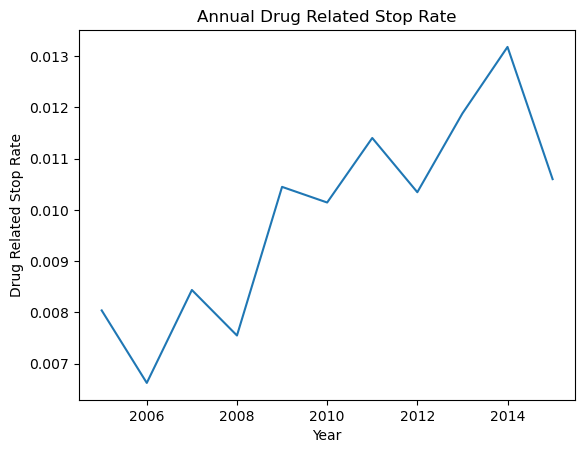

In [43]:
annual_drug_rate.plot(kind='line', xlabel='Year', ylabel='Drug Related Stop Rate', title='Annual Drug Related Stop Rate');

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [54]:
ri.head()

,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_year
0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005
1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005
2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005
3,2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005
4,2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005


In [ ]:
annual_search_rate = ri['search_conducted'].resample('A').mean()

In [ ]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis=1)

In [ ]:
annual.plot(subplots=True, figsize=(10, 6))

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [48]:
ri.head()

,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_year
0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005
1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005
2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005
3,2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005
4,2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005


In [51]:
ri.district.unique()

array(['Zone K1', 'Zone X4', 'Zone X1', 'Zone K3', 'Zone X3', 'Zone K2'],
      dtype=object)

In [52]:
ri.violation.unique()

array(['Speeding', 'Equipment', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [49]:
# Step 1: Create a frequency table from the district and violation columns
all_zones = pd.crosstab(ri['district'], ri['violation'])
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [53]:

# Step 2: Select rows 'Zone K1' through 'Zone K3' from all_zones
k_zones = all_zones.loc['Zone K1':'Zone K3']
print(k_zones)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1         3786              7127   1501                  628          1   
Zone K2        11285             16440   5103                 4056       2897   
Zone K3        12959             16218   3926                 3871       3660   

violation  Speeding  
district             
Zone K1       33067  
Zone K2       57500  
Zone K3       68234  


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [86]:
ri["stop_duration"].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

***

## Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the **average length** of time drivers are stopped for each **type** of **violation**. Rather than using the ``violation`` column in this exercise, you'll use ``violation_raw`` since it contains more detailed descriptions of the violations.

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

___

<p style='text-align: center;'><img src='https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV' class='img-fluid' alt='CLRSWY'></p>

___

**- Please save the edits made so far to a new csv file with the name RI_Part_3 to use it in the next step.**

**- Load and read new csv file.**

**- Check the first five rows.***

**- Check the shape of the dataframe.**